Classify news articles into categories using a simple ANN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data = pd.read_csv('train.csv')
print(len(data))

120000


In [9]:
data.shape


(120000, 3)

In [ ]:
data['Class Index'].value_counts()

In [11]:
X = data['Description']
y = data['Class Index'] - 1

Text column: Description | Target: Class Index (1=World, 2=Sports, 3=Business, 4=Sci/Tech)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_vectorized = vectorizer.fit_transform(X).toarray()

In [ ]:
X_vectorized.shape

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(5000,), activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8846 - loss: 0.3784 - val_accuracy: 0.9002 - val_loss: 0.2912
Epoch 2/5
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9128 - loss: 0.2484 - val_accuracy: 0.8953 - val_loss: 0.2930
Epoch 3/5
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9244 - loss: 0.2142 - val_accuracy: 0.8960 - val_loss: 0.2947
Epoch 4/5
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9340 - loss: 0.1858 - val_accuracy: 0.8974 - val_loss: 0.3049
Epoch 5/5
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9436 - loss: 0.1599 - val_accuracy: 0.8943 - val_loss: 0.3233


In [17]:
model.evaluate(X_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8952 - loss: 0.3305


[0.33048179745674133, 0.8951666951179504]

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(70.72222222222221, 0.5, 'Truth')

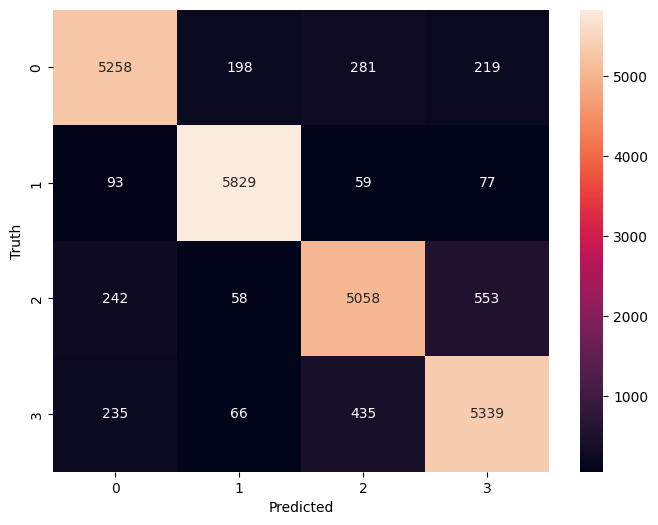

In [19]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')